In [1]:
# Load some libraries for reading the data from the database and plotting 

import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.tasks import *

from django.db.models import Count, Sum

p = Project.objects.get(pk=147)
qid = 6299


In [2]:
# Define some snappy names that will fit on the plots
# TODO: Someone should choose these carefully
short_name_dict = {
    "Sufficiency and distributional analyses in the demand side of climate change mitigation":"Sufficiency",
    "Determinants of low-carbon transport mode adoption: Systematic review of reviews": "Transport",
    "Status consciousness in energy consumption decisions: A systematic review of literature": "Status",
    "Exploring SDG links of dietary choice and food waste related mitigation solutions-II": "SDG Diets II",
    "Well-being/demand side search query": "Well-being",
    "Working time reduction in climate change mitigation (same paper, diff query)":"Working Time",
    "Working time reduction in climate change mitigation": "Working Time II",
    "Integrating Indigenous Knowledge Systems into climate change adaptation strategies for sustainable development": "Indigenous Knowledge",
    "Dematerialisation and sharing of goods: a systematic review of the determinants and magnitude of the indirect impacts on energy consumption":"Dematerialising & Sharing",
    "Mitigating climate change in food consumption and food waste: A systematic map of behavioural interventions": "Food Behaviour",
    "Disruptive consumer innovations for climate change": "Disruptive Innovations",
    "Exploring SDG links of dietary choice and food waste related mitigation solutions": "SDG Diets",
    "A literature survey on demand-side solutions for climate-change mitigation": "Literature Survey",
    "Urban energy demand in global south cities": "Global South Cities",
    "A Systematic Review for The Equity of Health Burdens Caused by Climate Change": "Health Equity",
    "Drivers for Behavioural Change": "Behavioural Drivers",
    "The potential for teleworking": "Teleworking"
}

Disruptive consumer innovations for climate change
Dematerialisation and sharing of goods: a systematic review of the determinants and magnitude of the indirect impacts on energy consumption
Well-being/demand side search query
Urban energy demand in global south cities
A Systematic Review for The Equity of Health Burdens Caused by Climate Change
The potential for teleworking
Exploring SDG links of dietary choice and food waste related mitigation solutions
Sufficiency and distributional analyses in the demand side of climate change mitigation
Working time reduction in climate change mitigation
Drivers for Behavioural Change
Mitigating climate change in food consumption and food waste: A systematic map of behavioural interventions
Determinants of low-carbon transport mode adoption: Systematic review of reviews
Integrating Indigenous Knowledge Systems into climate change adaptation strategies for sustainable development
A literature survey on demand-side solutions for climate-change mitig

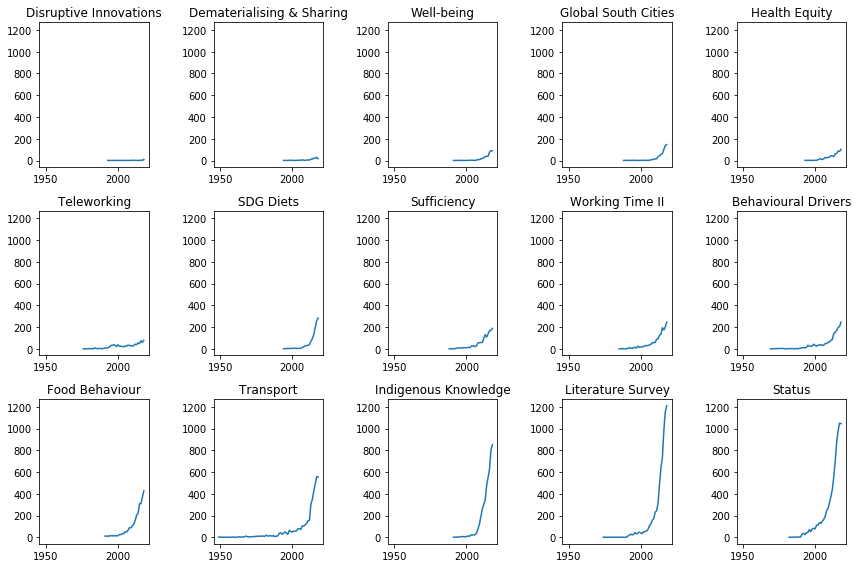

In [20]:
fig = plt.figure(figsize=(12,8))

qs = Query.objects.filter(
    project=p,
).exclude(
    pk__in=[6262,6265,6256,6263,6260,6303,6299,6270]
).order_by('r_count')

for i, q in enumerate(qs):
    print(q)
    if i > 0:
        ax = fig.add_subplot(3,5,i+1,sharey=ax,sharex=ax)
    else:
        ax = fig.add_subplot(3,5,i+1)
    qdocs = q.doc_set.filter(
        PY__lt=2019
    ).values('PY').annotate(
        n = Count('pk')
    ).order_by('PY')
    df = pd.DataFrame.from_dict(list(qdocs))
    ax.plot(df['PY'],df['n'])
    ax.set_title(short_name_dict[q.title])
    
fname = "plots/bibliometrics/reviews_PY"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)
    
fig.tight_layout()

a. Mitigation, sustainable development and the SDGs (human needs, access to services, and affordability)
b. Patterns of development and indicators of wellbeing
c. Sustainable consumption and production
d. Linking services with demand, sectors, systems - implications for mitigation and sustainable development
e. Culture, social norms, practices and behavioural changes for lower resource requirements
f. Sharing economy, collaborative consumption, community energy
g.	Implications of information and communication technologies for mitigation opportunities taking account of social change
h. Circular economy (maximising material and resource efficiency, closing loops): insights from life cycle assessment and material flow analysis
i. Social acceptability of supply and demand solutions 
j. Leapfrogging, capacity for change, feasible rates of change and lock-ins
k. Identifying actors, their roles and relationships
l. Impacts of non-mitigation policies (welfare, housing, land use, employment, et

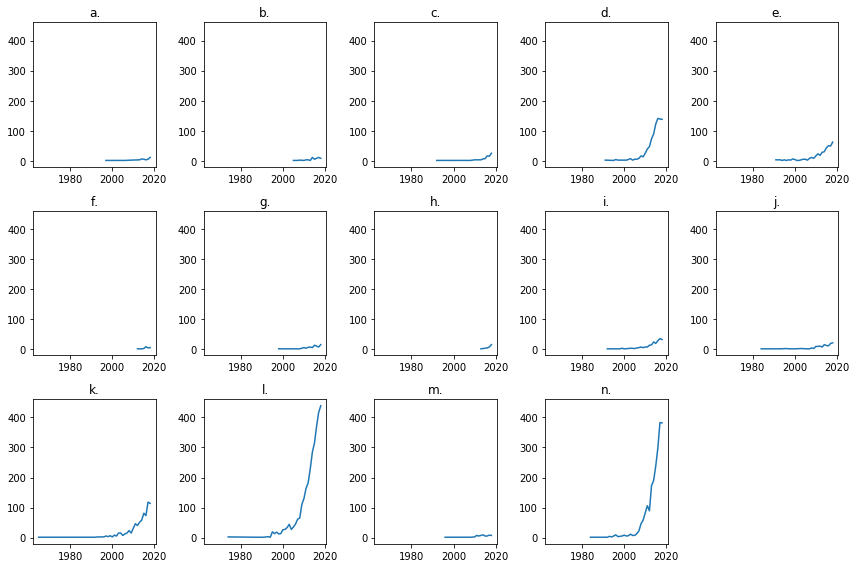

In [19]:
p2 = Project.objects.get(pk=148)


fig = plt.figure(figsize=(12,8))

for i, q in enumerate(p2.query_set.filter(database="WoS",title__iregex="^[a-z]\.").order_by('title')):
    print(q)
    if i > 0:
        ax = fig.add_subplot(3,5,i+1,sharey=ax,sharex=ax)
    else:
        ax = fig.add_subplot(3,5,i+1)
    qdocs = q.doc_set.filter(
        PY__lt=2019
    ).values('PY').annotate(
        n = Count('pk')
    ).order_by('PY')
    df = pd.DataFrame.from_dict(list(qdocs))
    ax.plot(df['PY'],df['n'])
    ax.set_title(q.title[:2])

    
fig.tight_layout()

fname = "plots/bibliometrics/chapters_PY"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)

plt.show()